# Insurance Claim Fraud Detection.

Importing Libaries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
fraud=pd.DataFrame(data=df)
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# EDA (Exploratory Data Analysis):

In [4]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

The names of all columns that are present in Churn Dataset

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Displaying all the columns Data Type and Null Values present in them

In [6]:
fraud.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

As we can see that there are no missing values present in the Dataset

In [7]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [8]:
fraud["policy_state"].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

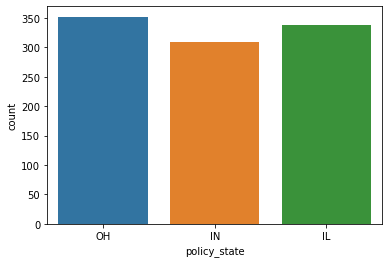

In [9]:
sns.countplot(fraud["policy_state"])

The 3 States of United States are present in the Dataset naming Ohio(OH), Indiana(IN) & Illinois(IL)

In [10]:
fraud["policy_csl"].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

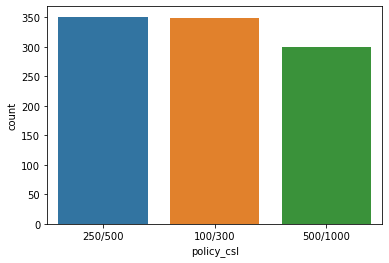

In [11]:
sns.countplot(fraud["policy_csl"])

There are 3 types of CSL (Combined Single Limit) policies in the Dataset

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

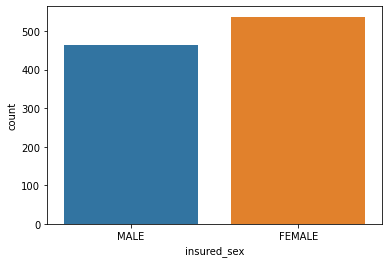

In [12]:
sns.countplot(fraud["insured_sex"])

 There are more Female insured persons in this Dataset than males

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

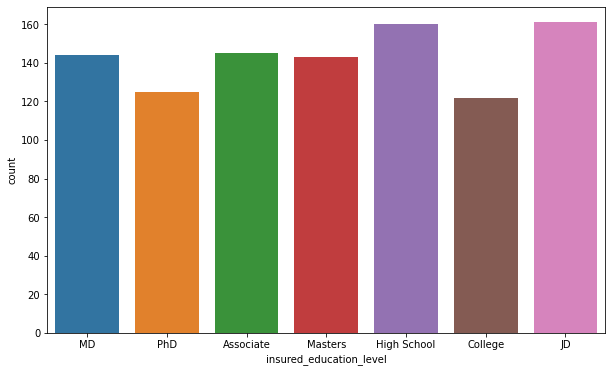

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["insured_education_level"])

Displaying the different Education levels of Insured Persons

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

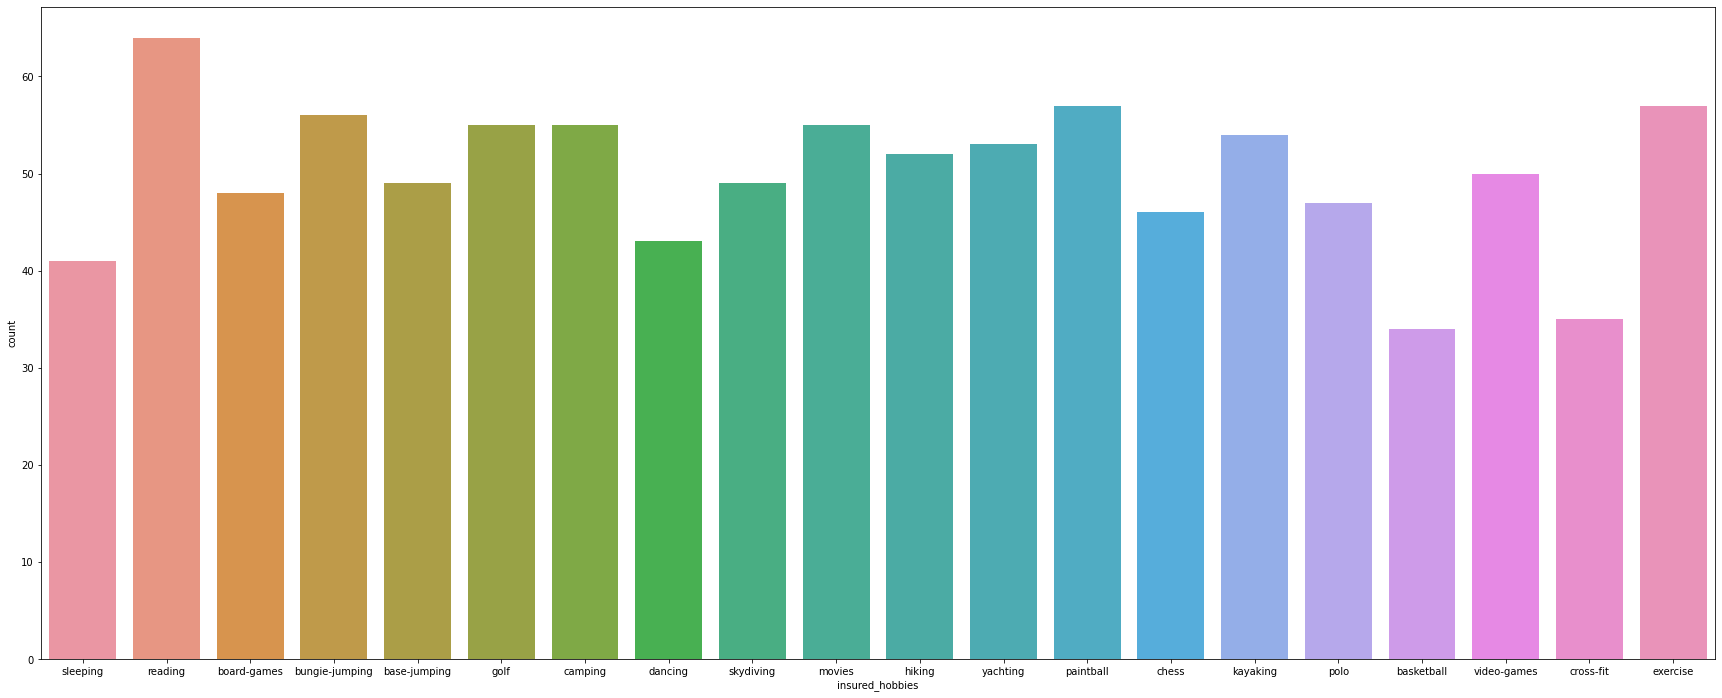

In [14]:
plt.figure(figsize=(30,12))
sns.countplot(fraud["insured_hobbies"])


Graph shows that Reading & Exercise are the most common Hobbies among the insured persons

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

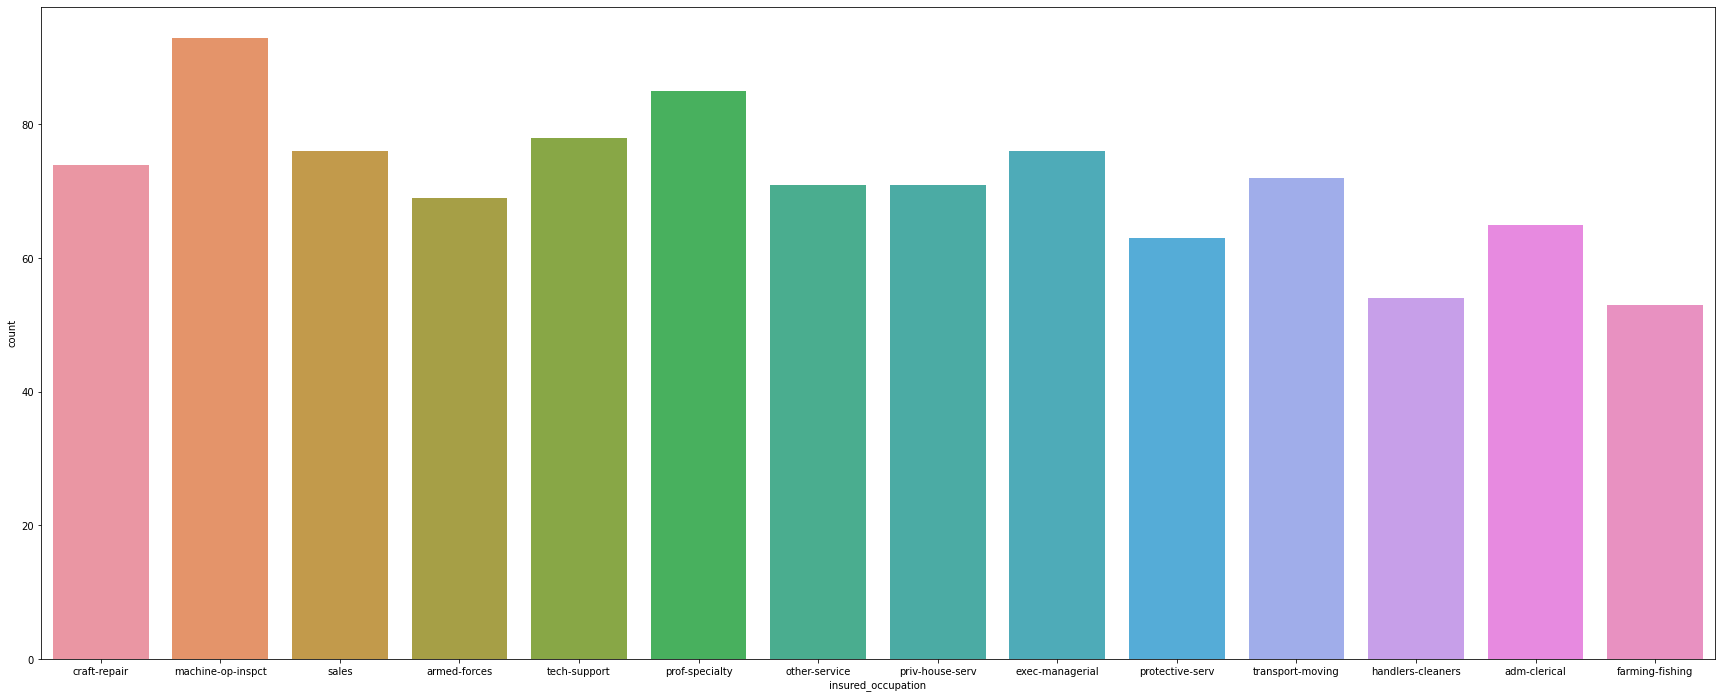

In [15]:
plt.figure(figsize=(30,12))
sns.countplot(fraud["insured_occupation"])

The Graph shows that mostly insured persons are from Machine Operations Occupation and it requires a compulsory insurance as it is dangerous job to work at machines

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

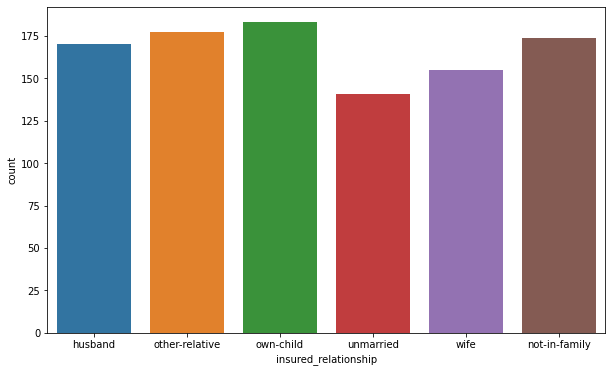

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["insured_relationship"])

Graph showing the relationship of the insured person in the family

<AxesSubplot:xlabel='incident_type', ylabel='count'>

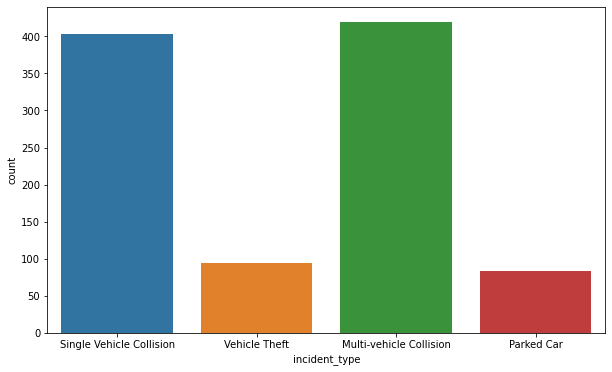

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_type"])

The Graph shows 4 kinds of incidents under which insured persons have raised a claim in this Dataset

<AxesSubplot:xlabel='incident_state', ylabel='count'>

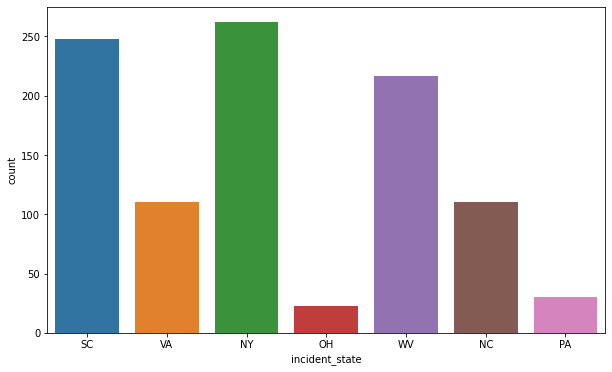

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_state"])


The Graph shows the different states of United States in which the incidents took place

<AxesSubplot:xlabel='incident_city', ylabel='count'>

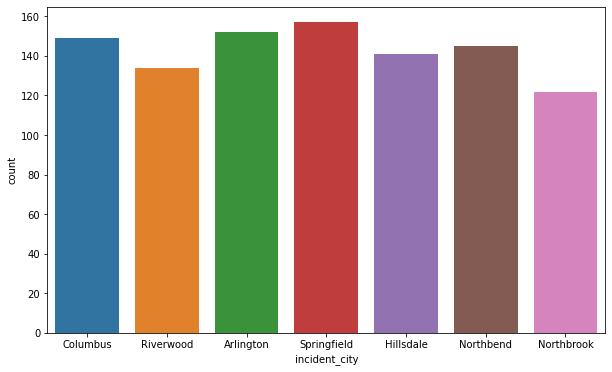

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_city"])

The Graph shows the different cities of United States in which the incidents took place

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

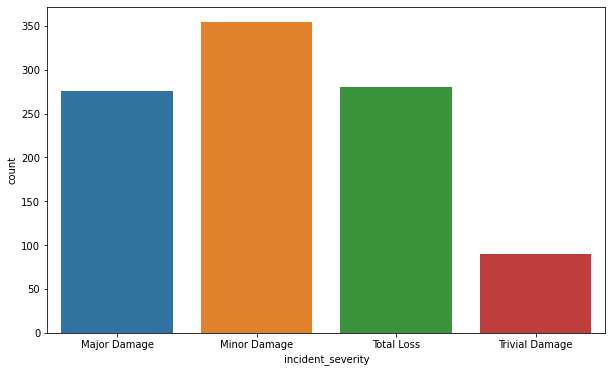

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["incident_severity"])

The Graph shows that there are most cases of minor damage and total loss in the dataset

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

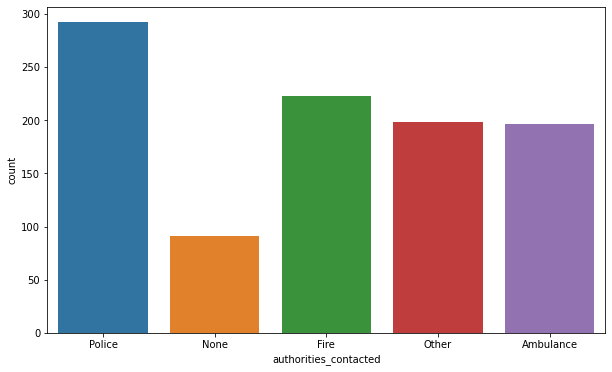

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["authorities_contacted"])

The Graph shows that Police was the most prior authority people contacted after the incidents while Fire authorities were second in place when it comes to authorities contacted

<AxesSubplot:xlabel='property_damage', ylabel='count'>

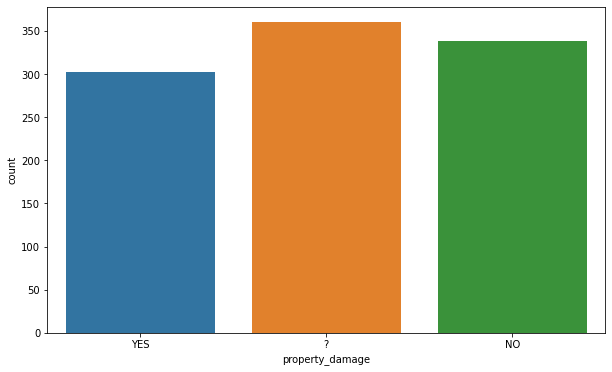

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(fraud["property_damage"])

The Graph shows that there are missing values present in this column marked with "?" Most claims are not related to property damage

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

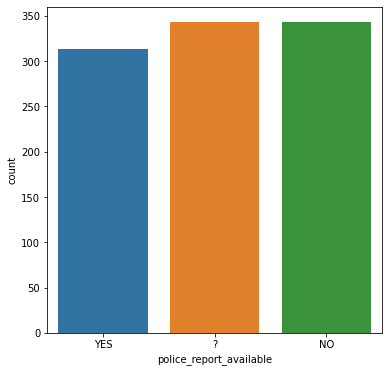

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(fraud["police_report_available"])

The Graph shows that there are missing values present in this column marked with "?"  Most claims do not have police reports available

<AxesSubplot:xlabel='count', ylabel='auto_make'>

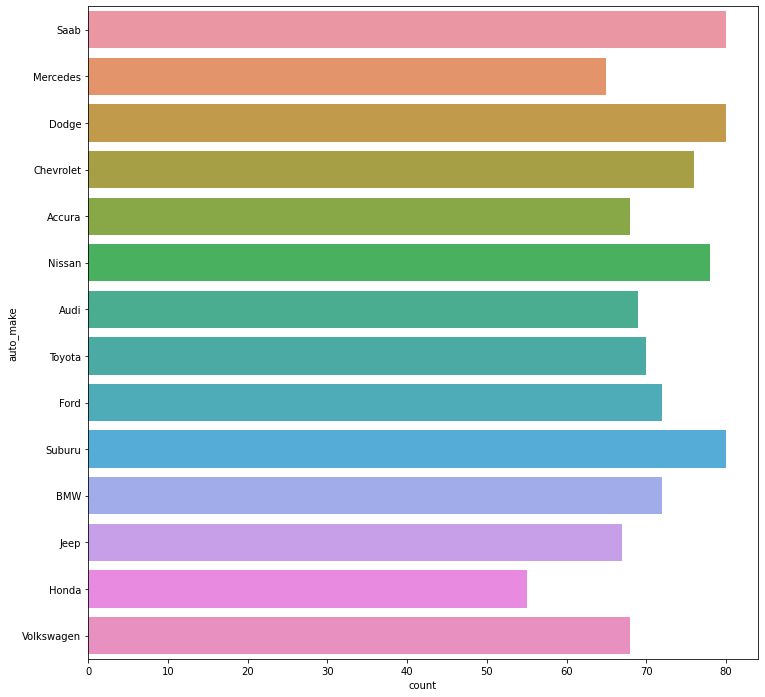

In [24]:
plt.figure(figsize=(12,12))
sns.countplot(y=fraud["auto_make"])

This Graph shows that most car makes data are of Dodge, Suburu & Saab while the least car make data is of Honda

<AxesSubplot:xlabel='count', ylabel='auto_model'>

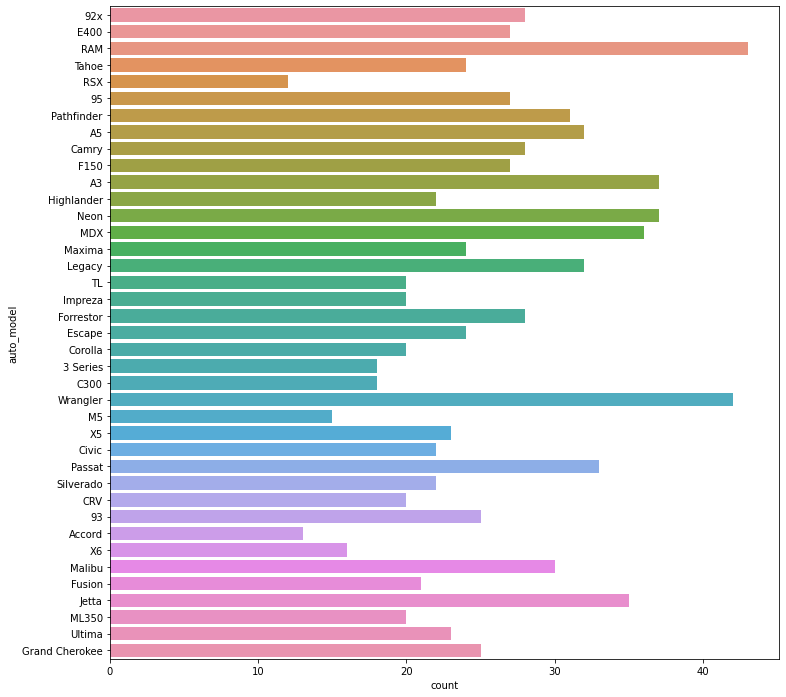

In [25]:
plt.figure(figsize=(12,12))
sns.countplot(y=fraud["auto_model"])

The graph shows that Most Car models in dataset are RAM & Wrangler

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

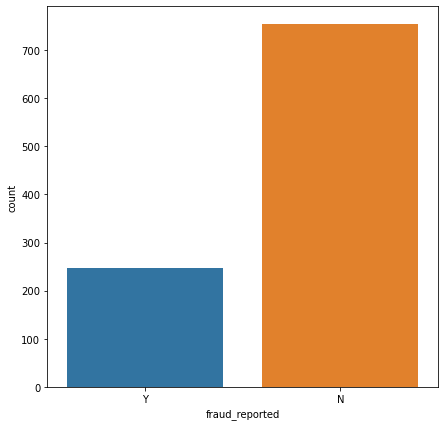

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(fraud["fraud_reported"])


The Graph shows that out of 1000 data there are 250 Frauds found means that there are 25% fraudulent claims in Dataset

<AxesSubplot:xlabel='count', ylabel='auto_make'>

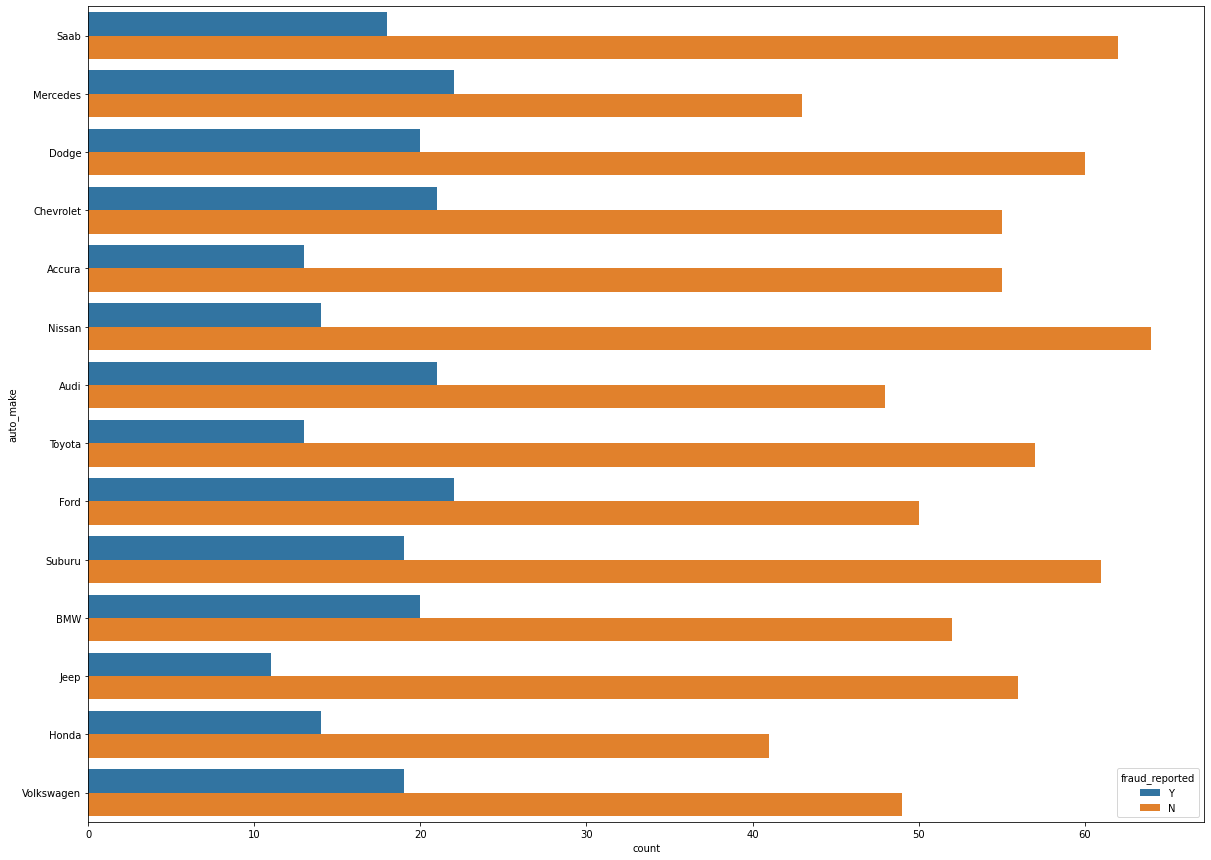

In [27]:
plt.figure(figsize=(20,15))
sns.countplot(y=fraud["auto_make"],hue=fraud["fraud_reported"])

<AxesSubplot:xlabel='count', ylabel='auto_model'>

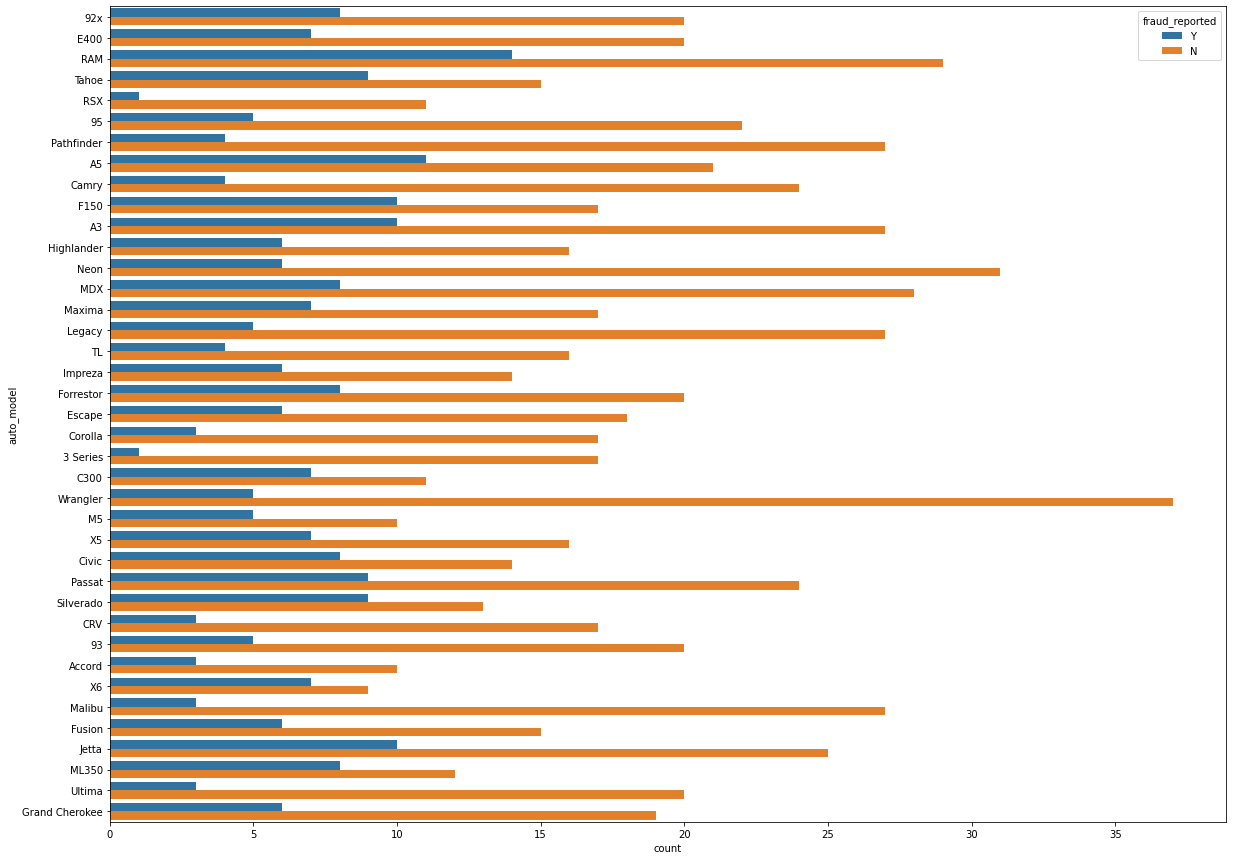

In [28]:
plt.figure(figsize=(20,15))
sns.countplot(y=fraud["auto_model"],hue=fraud["fraud_reported"])


The graph shows that most frauds are related to RAM, A5 & Jetta car models

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

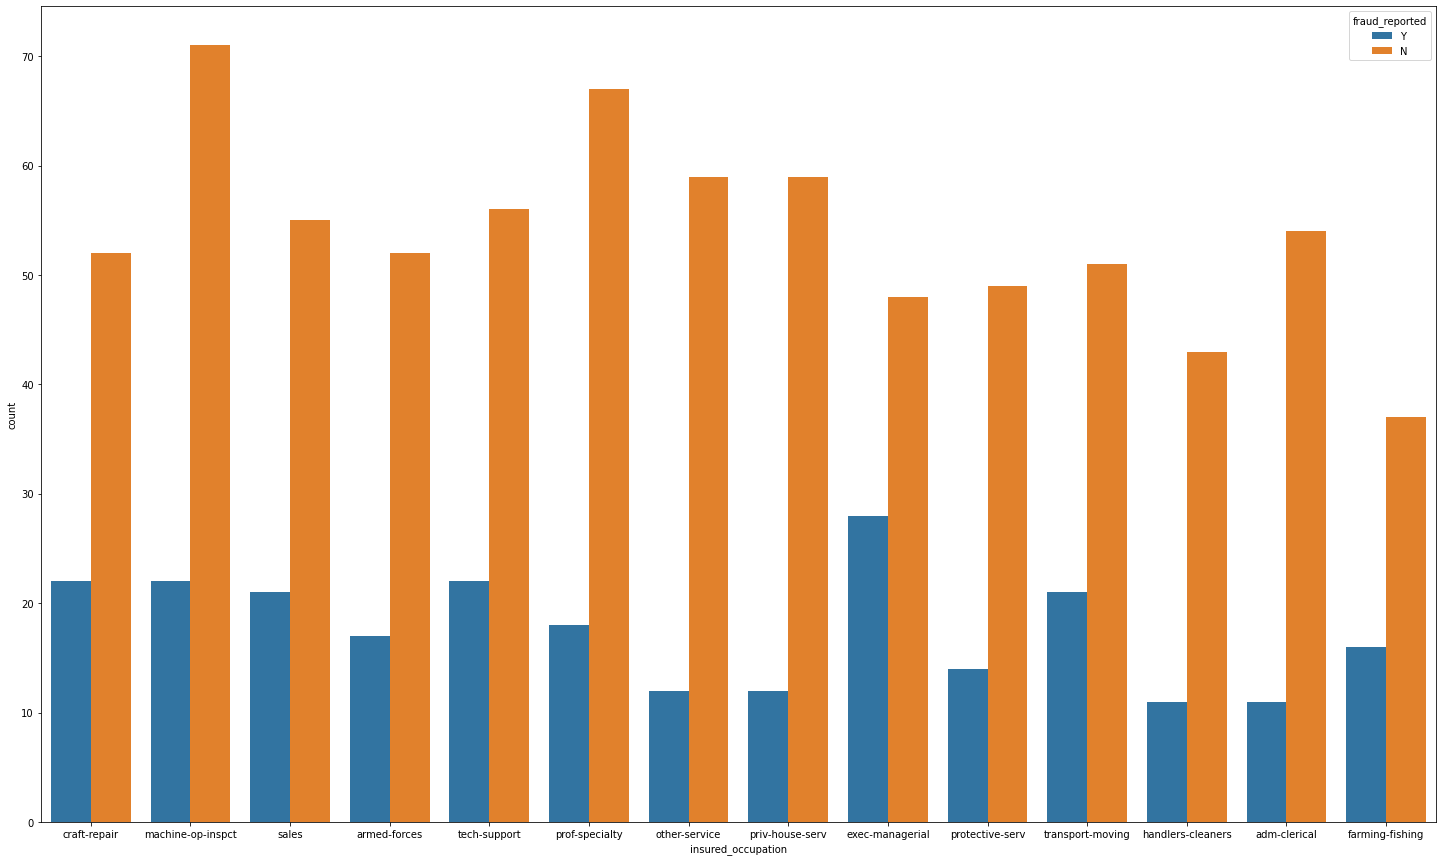

In [29]:
plt.figure(figsize=(25,15))
sns.countplot(fraud["insured_occupation"],hue=fraud["fraud_reported"])


The Graph shows that most fraud claims are from people working on occupation as Executive Managers The least fraud claims are from other occupations

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

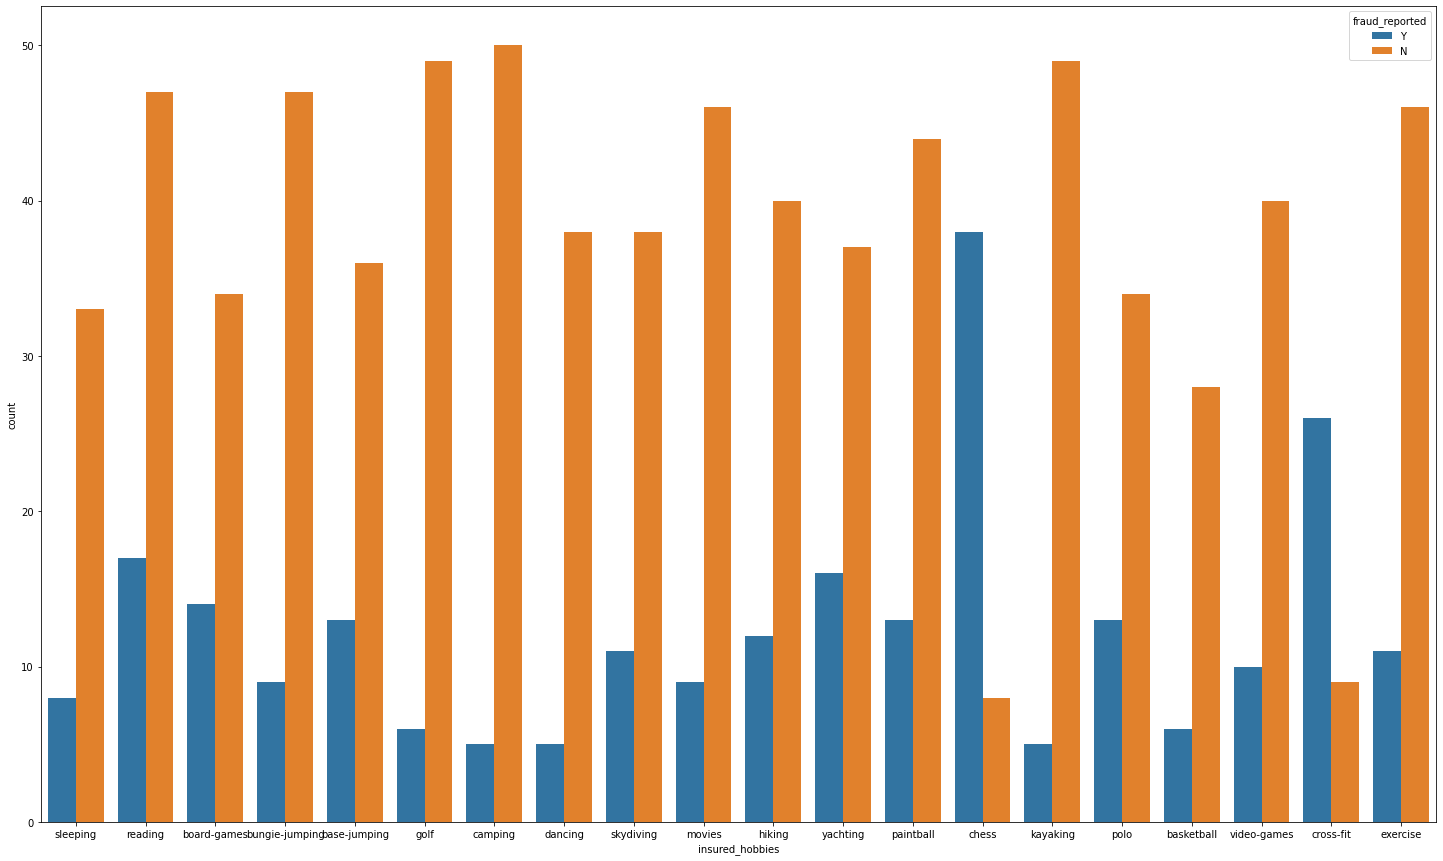

In [30]:
plt.figure(figsize=(25,15))
sns.countplot(fraud["insured_hobbies"],hue=fraud["fraud_reported"])

The Graph shows that most of the fraud claims come from people having hobbies as Chess & Cros Both the hobbies require mind and planning which are also the skills that are required to do fraudulent activities

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

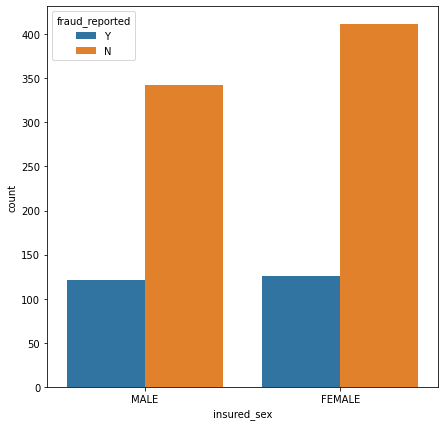

In [31]:
plt.figure(figsize=(7,7))
sns.countplot(fraud["insured_sex"],hue=fraud["fraud_reported"])

The Graph shows almost equal number of fraudulent claims from male and female insured persons

<AxesSubplot:xlabel='policy_state', ylabel='count'>

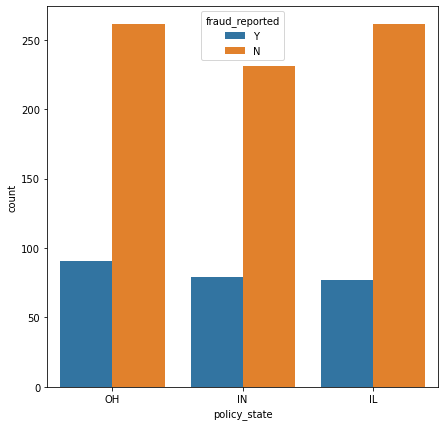

In [32]:
plt.figure(figsize=(7,7))
sns.countplot(fraud["policy_state"],hue=fraud["fraud_reported"])

The Graph shows that more number of Fraud claims come from OH and almost equal number of fraud claims from IN & IL states


<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

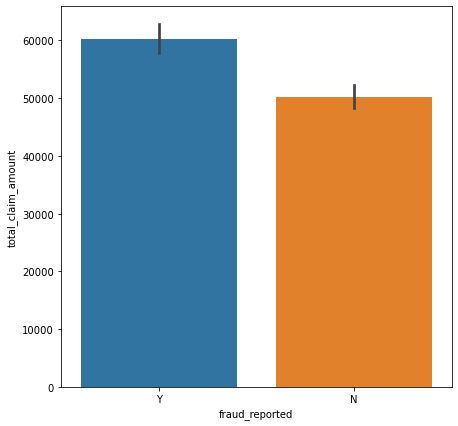

In [33]:
plt.figure(figsize=(7,7))
sns.barplot(x=fraud["fraud_reported"],y=fraud["total_claim_amount"])

The Graph shows that total claim amounts are very high in case of fraudulent claims

# Data Cleaning & Feature Engineering:

In [34]:
fraud=fraud.replace(to_replace="?", value=np.NaN)
fraud


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Replacing the ? in different columns of the Dataset with Missing values as ? indicates missing values

In [35]:
fraud.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

As we can see there are ? or missing values present in 3 columns of the Dataset ie:  Collision_type, Property_damage & police_report_available

In [36]:
# Filling the Missing Values in the Dataset
fraud['collision_type'].fillna(fraud['collision_type'].mode()[0], inplace = True)
fraud['property_damage'].fillna('NO', inplace = True)
fraud['police_report_available'].fillna('NO', inplace = True)

In [37]:
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [38]:
fraud["Years_as_customer"]=fraud["months_as_customer"]/12
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,27.333333
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,19.000000
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,11.166667
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,21.333333
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NO,87200,17440,8720,61040,Honda,Accord,2006,N,0.250000
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,23.750000
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,10.833333
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,38.166667


Converting months to years of Customers joining period with the company

In [39]:
fraud.drop(columns=["months_as_customer"],inplace=True)
fraud

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer
0,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,27.333333
1,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,19.000000
2,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,11.166667
3,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,21.333333
4,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NO,87200,17440,8720,61040,Honda,Accord,2006,N,0.250000
996,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,23.750000
997,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,10.833333
998,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,38.166667


Dropping the column months_as_customer to avoid multicollinearity

In [40]:
fraud.isnull().sum()

age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

As we can see there are no more missing values present in the dataset

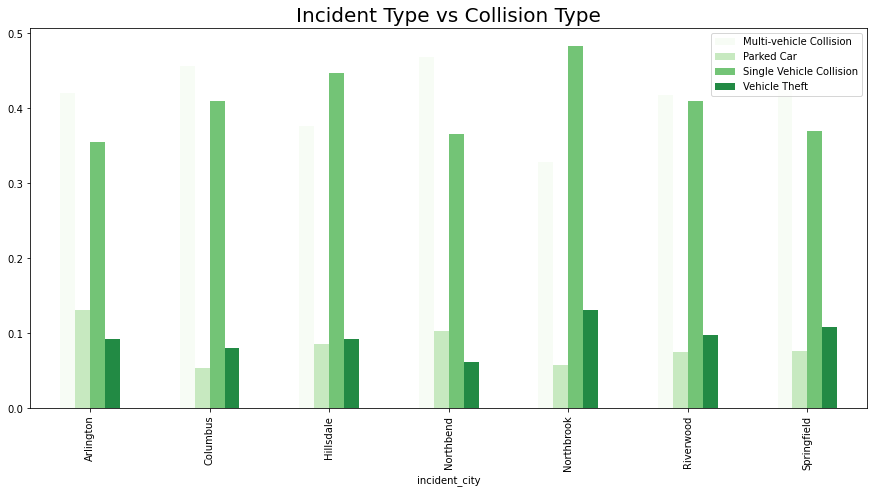

In [41]:
incident = pd.crosstab(fraud['incident_city'], fraud['incident_type'])
colors = plt.cm.Greens(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

In [42]:
# Importing the Label Encoder from Sklearn Library
from sklearn.preprocessing import LabelEncoder



In [43]:
le=LabelEncoder()

In [44]:
for i in fraud.columns:
    if fraud[i].dtypes=="object":
        fraud[i]=le.fit_transform(fraud[i].values.reshape(-1,1))
        

Running a for loop to give numeric values to strings using the Label Encoder in fraud dataset

In [45]:
fraud

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer
0,48,521585,532,2,1,1000,1406.91,0,466132,1,...,1,71610,6510,13020,52080,10,1,2004,1,27.333333
1,42,342868,821,1,1,2000,1197.22,5000000,468176,1,...,0,5070,780,780,3510,8,12,2007,1,19.000000
2,29,687698,186,2,0,2000,1413.14,5000000,430632,0,...,0,34650,7700,3850,23100,4,30,2007,0,11.166667
3,41,227811,766,0,1,2000,1415.74,6000000,608117,0,...,0,63400,6340,6340,50720,3,34,2014,1,21.333333
4,44,367455,181,0,2,1000,1583.91,6000000,610706,1,...,0,6500,1300,650,4550,0,31,2009,0,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,487,2,2,1000,1310.80,0,431289,0,...,0,87200,17440,8720,61040,6,6,2006,0,0.250000
996,41,186934,129,0,0,1000,1436.79,0,608177,0,...,0,108480,18080,18080,72320,13,28,2015,0,23.750000
997,34,918516,509,2,1,500,1383.49,3000000,442797,0,...,1,67500,7500,7500,52500,11,19,1996,0,10.833333
998,62,533940,573,0,2,2000,1356.92,5000000,441714,1,...,1,46980,5220,5220,36540,1,5,1998,0,38.166667


In [46]:
fraud_corr=fraud.corr()
fraud_corr


,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer
age,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.922098
policy_number,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,0.057555
policy_bind_date,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,...,-0.011563,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642,0.055055
policy_state,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.000328
policy_csl,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.026819
policy_deductable,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,0.026807
policy_annual_premium,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,0.005018
umbrella_limit,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.015498
insured_zip,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,0.017895
insured_sex,0.073337,0.004564,0.039338,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,0.060925


<AxesSubplot:>

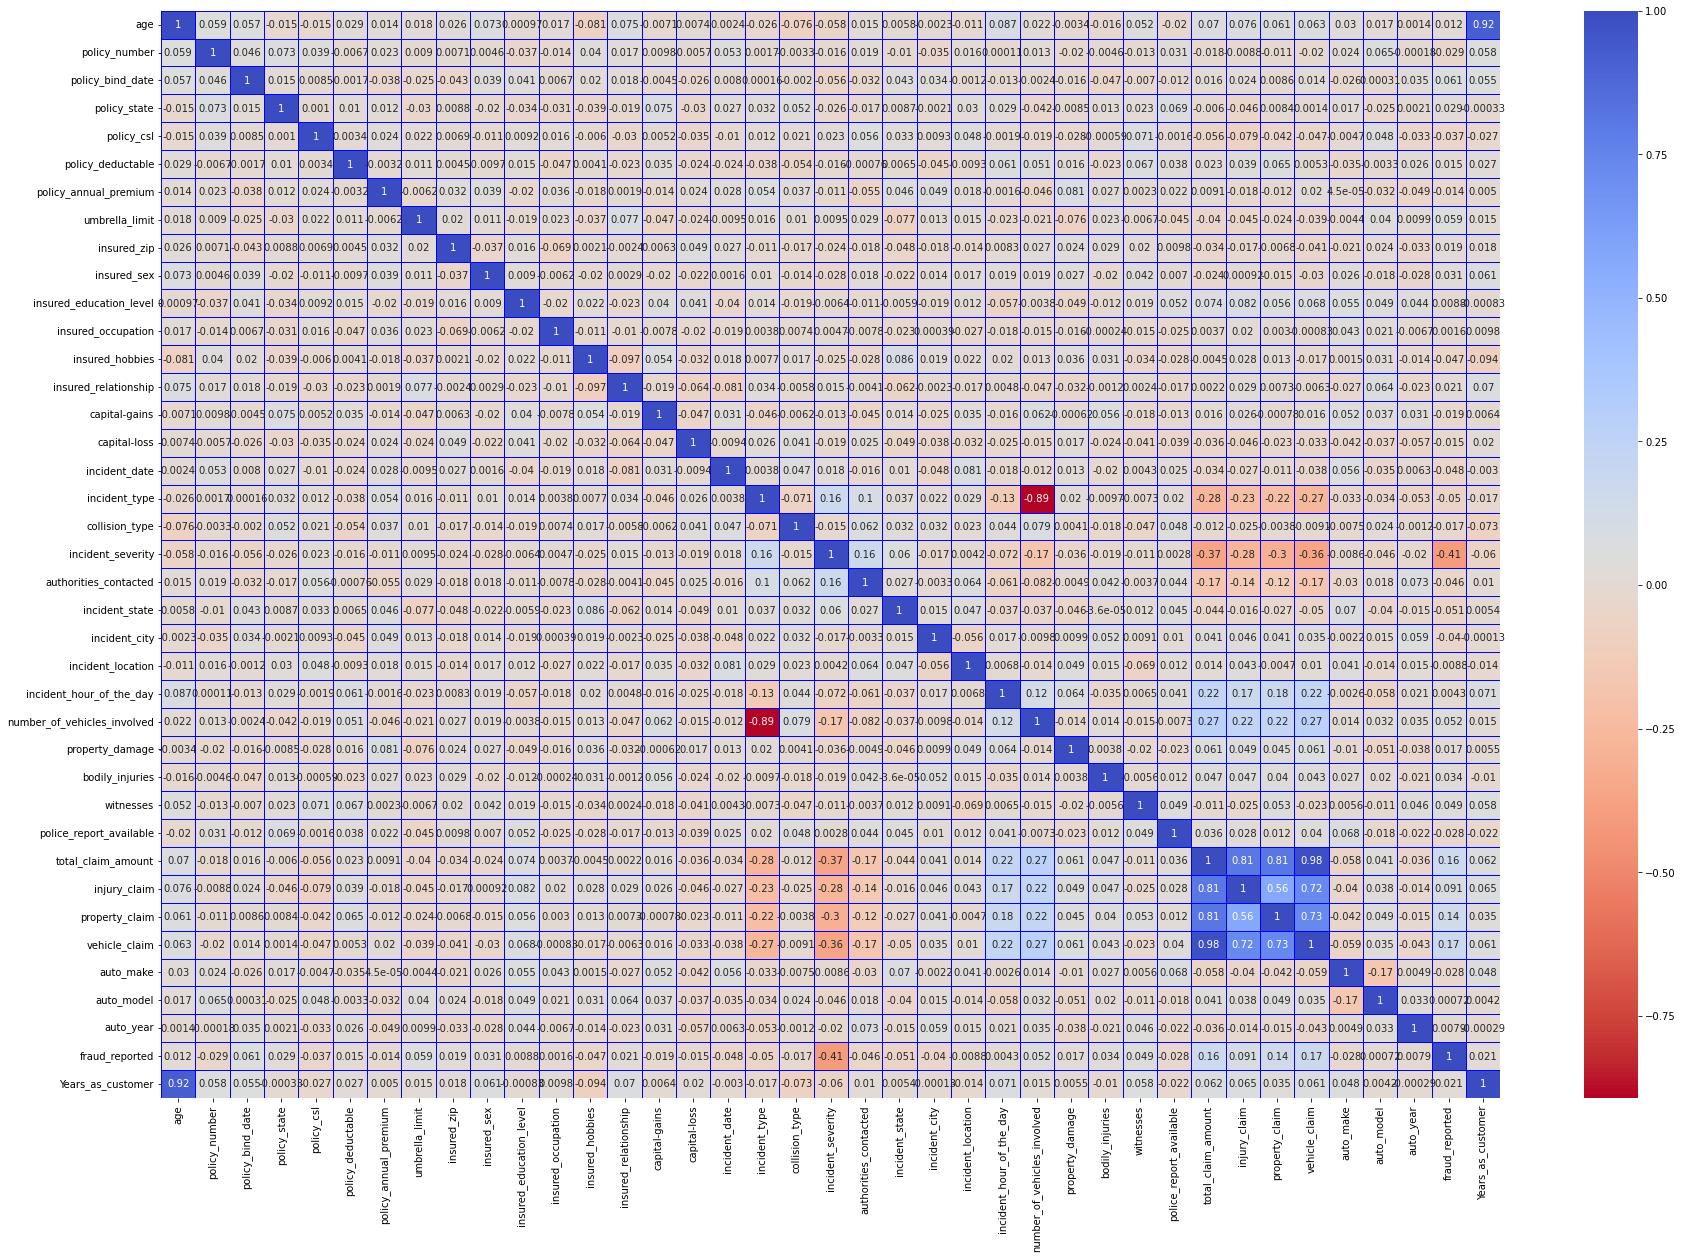

In [47]:
plt.figure(figsize=(30,20))
sns.heatmap(fraud_corr, annot=True, linewidths=0.5, linecolor="blue", cmap="coolwarm_r")

In [48]:
fraud.columns

Index(['age', 'policy_number', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Years_as_customer'],
      dtype='object')

In [49]:
fraud.drop(columns=["injury_claim","property_claim","vehicle_claim"],inplace=True)
fraud

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer
0,48,521585,532,2,1,1000,1406.91,0,466132,1,...,1,1,2,1,71610,10,1,2004,1,27.333333
1,42,342868,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,0,5070,8,12,2007,1,19.000000
2,29,687698,186,2,0,2000,1413.14,5000000,430632,0,...,0,2,3,0,34650,4,30,2007,0,11.166667
3,41,227811,766,0,1,2000,1415.74,6000000,608117,0,...,0,1,2,0,63400,3,34,2014,1,21.333333
4,44,367455,181,0,2,1000,1583.91,6000000,610706,1,...,0,0,1,0,6500,0,31,2009,0,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,487,2,2,1000,1310.80,0,431289,0,...,1,0,1,0,87200,6,6,2006,0,0.250000
996,41,186934,129,0,0,1000,1436.79,0,608177,0,...,1,2,3,0,108480,13,28,2015,0,23.750000
997,34,918516,509,2,1,500,1383.49,3000000,442797,0,...,0,2,3,1,67500,11,19,1996,0,10.833333
998,62,533940,573,0,2,2000,1356.92,5000000,441714,1,...,0,0,1,1,46980,1,5,1998,0,38.166667


Dropping these 3 Columns as total_claim_amount is the sum of all 3 columns

In [50]:
fraud['incident_day'] = pd.DatetimeIndex(fraud['incident_date']).day
fraud['incident_month'] = pd.DatetimeIndex(fraud['incident_date']).month

In [51]:
fraud

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer,incident_day,incident_month
0,48,521585,532,2,1,1000,1406.91,0,466132,1,...,2,1,71610,10,1,2004,1,27.333333,1,1
1,42,342868,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,8,12,2007,1,19.000000,1,1
2,29,687698,186,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,4,30,2007,0,11.166667,1,1
3,41,227811,766,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,3,34,2014,1,21.333333,1,1
4,44,367455,181,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,0,31,2009,0,19.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,487,2,2,1000,1310.80,0,431289,0,...,1,0,87200,6,6,2006,0,0.250000,1,1
996,41,186934,129,0,0,1000,1436.79,0,608177,0,...,3,0,108480,13,28,2015,0,23.750000,1,1
997,34,918516,509,2,1,500,1383.49,3000000,442797,0,...,3,1,67500,11,19,1996,0,10.833333,1,1
998,62,533940,573,0,2,2000,1356.92,5000000,441714,1,...,1,1,46980,1,5,1998,0,38.166667,1,1


In [52]:
fraud.drop(columns=["policy_bind_date","policy_number","incident_date","incident_location"],inplace=True)

Dropping the columns as they dont have realtionship with target variable

In [53]:
fraud

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,Years_as_customer,incident_day,incident_month
0,48,2,1,1000,1406.91,0,466132,1,4,2,...,2,1,71610,10,1,2004,1,27.333333,1,1
1,42,1,1,2000,1197.22,5000000,468176,1,4,6,...,0,0,5070,8,12,2007,1,19.000000,1,1
2,29,2,0,2000,1413.14,5000000,430632,0,6,11,...,3,0,34650,4,30,2007,0,11.166667,1,1
3,41,0,1,2000,1415.74,6000000,608117,0,6,1,...,2,0,63400,3,34,2014,1,21.333333,1,1
4,44,0,2,1000,1583.91,6000000,610706,1,0,11,...,1,0,6500,0,31,2009,0,19.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2,2,1000,1310.80,0,431289,0,5,2,...,1,0,87200,6,6,2006,0,0.250000,1,1
996,41,0,0,1000,1436.79,0,608177,0,6,9,...,3,0,108480,13,28,2015,0,23.750000,1,1
997,34,2,1,500,1383.49,3000000,442797,0,5,1,...,3,1,67500,11,19,1996,0,10.833333,1,1
998,62,0,2,2000,1356.92,5000000,441714,1,0,5,...,1,1,46980,1,5,1998,0,38.166667,1,1


# Checking the Class Imbalance:

In [54]:
x=fraud.drop(columns=["fraud_reported"])
x

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,Years_as_customer,incident_day,incident_month
0,48,2,1,1000,1406.91,0,466132,1,4,2,...,1,2,1,71610,10,1,2004,27.333333,1,1
1,42,1,1,2000,1197.22,5000000,468176,1,4,6,...,0,0,0,5070,8,12,2007,19.000000,1,1
2,29,2,0,2000,1413.14,5000000,430632,0,6,11,...,2,3,0,34650,4,30,2007,11.166667,1,1
3,41,0,1,2000,1415.74,6000000,608117,0,6,1,...,1,2,0,63400,3,34,2014,21.333333,1,1
4,44,0,2,1000,1583.91,6000000,610706,1,0,11,...,0,1,0,6500,0,31,2009,19.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2,2,1000,1310.80,0,431289,0,5,2,...,0,1,0,87200,6,6,2006,0.250000,1,1
996,41,0,0,1000,1436.79,0,608177,0,6,9,...,2,3,0,108480,13,28,2015,23.750000,1,1
997,34,2,1,500,1383.49,3000000,442797,0,5,1,...,2,3,1,67500,11,19,1996,10.833333,1,1
998,62,0,2,2000,1356.92,5000000,441714,1,0,5,...,0,1,1,46980,1,5,1998,38.166667,1,1


In [55]:
y=fraud.fraud_reported
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

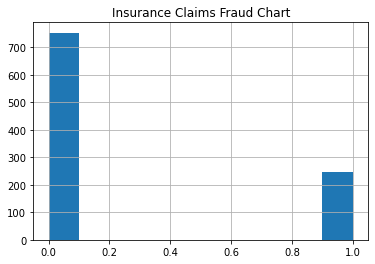

In [56]:
fraud["fraud_reported"].hist(grid=True)
plt.title("Insurance Claims Fraud Chart")
plt.show()

As we can clearly see that there is a class imbalance problem in the target variable ["fraud_reported"]

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
sm=SMOTE()

In [59]:
x_over, y_over = sm.fit_resample(x,y)


In [60]:
y_over.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

# Finding Best Random State:

Decision Tree Classifier:

In [61]:
# Importing the algorithms and Evolution Matrix of Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [62]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc_train=dtc.predict(x_train)
    preddtc_test=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.8642384105960265 on Random State  119


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=182)

In [64]:
# Training the Decision Tree Classifier Model
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

The Decision Tree Classifier Model is predicting values based on training

In [66]:
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.8211920529801324
[[140  28]
 [ 26 108]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       168
           1       0.79      0.81      0.80       134

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302



The Accuracy Score & Evolution Matrix of Decision Tree Classifier Model

# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc_train=rfc.predict(x_train)
    predrfc_test=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.9205298013245033 on Random State  96


Finding Best Random State with Maximum Accuracy

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=224)

In [70]:
# Training the Random Forest Classifier Model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [71]:
rfc_pred=rfc.predict(x_test)
rfc_pred


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

 The Random Forest Classifier Model is predicting values based on training

In [72]:
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))


0.8973509933774835
[[156  12]
 [ 19 115]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       168
           1       0.91      0.86      0.88       134

    accuracy                           0.90       302
   macro avg       0.90      0.89      0.90       302
weighted avg       0.90      0.90      0.90       302



The Accuracy Score & Evolution Matrix of Random Forest Classifier Model

# Extra Trees Classifier:

In [73]:
from sklearn.ensemble import ExtraTreesClassifier


In [74]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=i)
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    predetc_train=etc.predict(x_train)
    predetc_test=etc.predict(x_test)
    acc=accuracy_score(y_test,predetc_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)


Best Accuracy is  0.9205298013245033 on Random State  96


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=467)

In [76]:
# Training the Extra Trees Classifier Model
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)


ExtraTreesClassifier()

In [77]:
etc_pred=etc.predict(x_test)
etc_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

The Extra Trees Classifier Model is predicting values based on training

In [78]:
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

0.9006622516556292
[[134  14]
 [ 16 138]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       148
           1       0.91      0.90      0.90       154

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



The Accuracy Score & Evolution Matrix of Extra Trees Classifier Model

# Adaboost Classifier:

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=i)
    adb=AdaBoostClassifier()
    adb.fit(x_train,y_train)
    predadb_train=adb.predict(x_train)
    predadb_test=adb.predict(x_test)
    acc=accuracy_score(y_test,predadb_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.9039735099337748 on Random State  96


 Finding Best Random State with Maximum Accuracy

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.20,random_state=467)

In [82]:
## Training the AdaBoost Classifier Model
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [83]:
adb_pred=adb.predict(x_test)
adb_pred


array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

The AdaBoost Classifier Model is predicting values based on training

In [84]:
print(accuracy_score(y_test,adb_pred))
print(confusion_matrix(y_test,adb_pred))
print(classification_report(y_test,adb_pred))

0.8675496688741722
[[133  15]
 [ 25 129]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       148
           1       0.90      0.84      0.87       154

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



The Accuracy Score & Evolution Matrix of AdaBoost Classifier Model

# Cross Validation:

In [85]:
from sklearn.model_selection import cross_val_score


In [86]:
scr1=cross_val_score(dtc, x_over, y_over, cv=5)
scr1

array([0.73178808, 0.74750831, 0.82392027, 0.87375415, 0.8538206 ])

In [87]:
print("The Cross Validation Score of Decision Tree Classifier is :", scr1.mean())


The Cross Validation Score of Decision Tree Classifier is : 0.806158280345867


In [88]:
scr2=cross_val_score(rfc, x_over, y_over, cv=5)
scr2

array([0.74503311, 0.82392027, 0.90365449, 0.93687708, 0.9269103 ])

In [89]:
print("The Cross Validation Score of Random Forest Classifier is :", scr2.mean())

The Cross Validation Score of Random Forest Classifier is : 0.8672790477657257


In [90]:
scr3=cross_val_score(etc, x_over, y_over, cv=5)
scr3

array([0.70198675, 0.80730897, 0.93023256, 0.93687708, 0.93023256])

In [91]:
print("The Cross Validation Score of Extra Trees Classifier is :", scr3.mean())

The Cross Validation Score of Extra Trees Classifier is : 0.861327583551517


In [92]:
scr4=cross_val_score(adb, x_over, y_over, cv=5)
scr4

array([0.68874172, 0.76744186, 0.86710963, 0.91694352, 0.93355482])

In [93]:
print("The Cross Validation Score of AdaBoost Classifier is :", scr4.mean())

The Cross Validation Score of AdaBoost Classifier is : 0.8347583111482695


# Hyper Parameter Tuning:

In [94]:
from sklearn.model_selection import GridSearchCV

In [97]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,CV=5)

NameError: name 'parameter' is not defined

In [96]:
GCV.fit(x_train,y_train)

NameError: name 'GCV' is not defined

In [ ]:
GCV.best_params_


In [ ]:
final_model=RandomForestClassifier(criterion="gini", max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=8)
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
acc=accuracy_score(y_test,final_model_pred)
print(acc*100)

# Saving the Random Forest Classifier Model 

In [ ]:
# importing the Joblib function to perform Serialization
import joblib

In [ ]:
# Dumping the Final model for deployment into the object file "Insurance_Fraud_Model.obj"
joblib.dump(final_model,"Insurance_Fraud_Model.obj")
